# Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

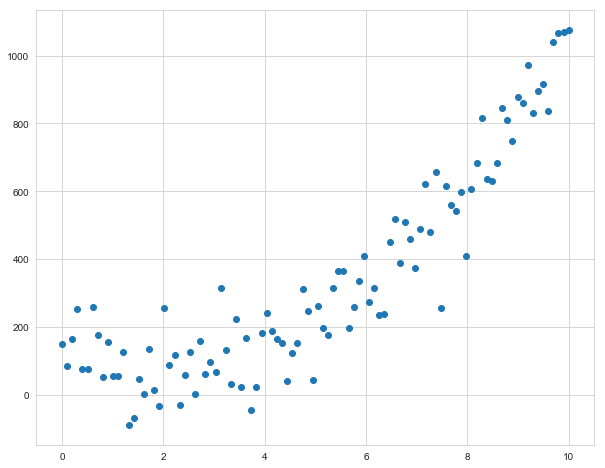

In [2]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0,10,100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + rng + 100

plt.figure(figsize = (10,8))
plt.scatter(X, y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

0.7643394574930141


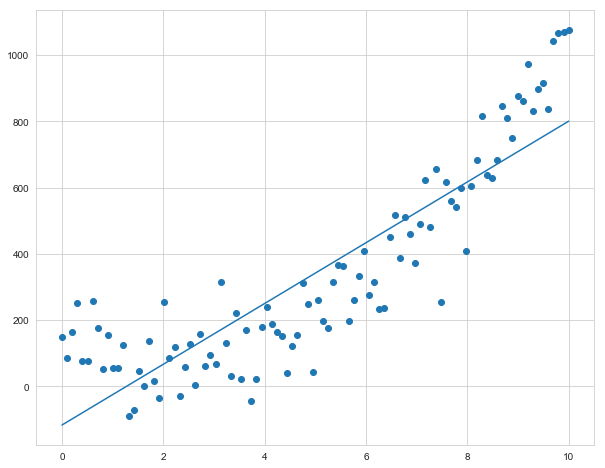

In [4]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
model_pred = lr.predict(X.reshape(-1,1))
plt.figure(figsize = (10,8))
plt.scatter(X,y)
plt.plot(X, model_pred)
print(r2_score(y,model_pred))

## Polynomial

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [11]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1,1))
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


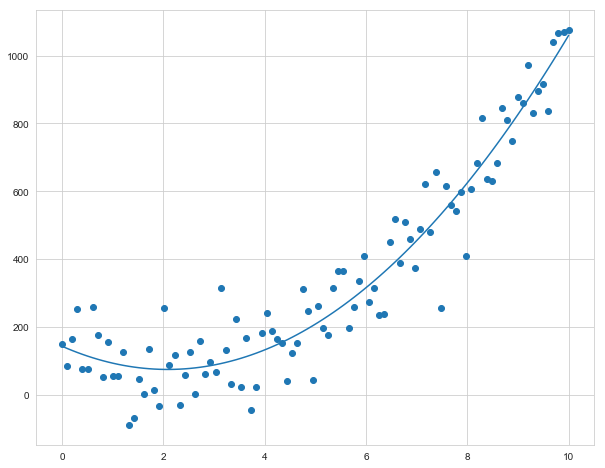

In [12]:
plt.figure(figsize = (10,8))
plt.scatter(X, y)
plt.plot(X, y_pred)
print(r2_score(y,y_pred))

In [15]:
df_boston = pd.read_csv('housing.data', delim_whitespace=True, header = None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [16]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

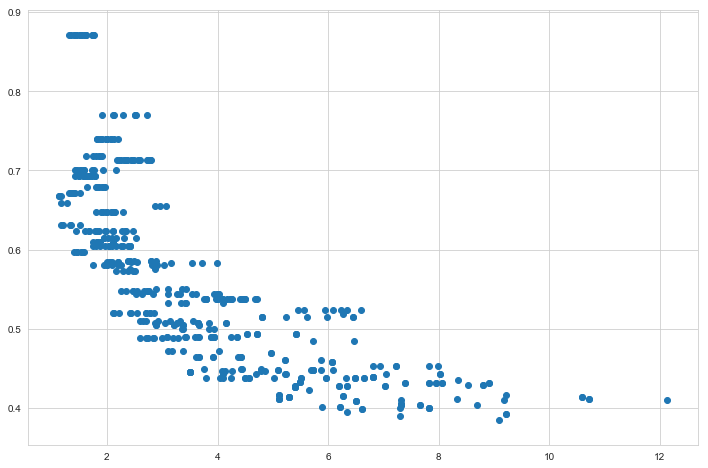

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(X_boston, y_boston)

## Linear

0.5917149670934201


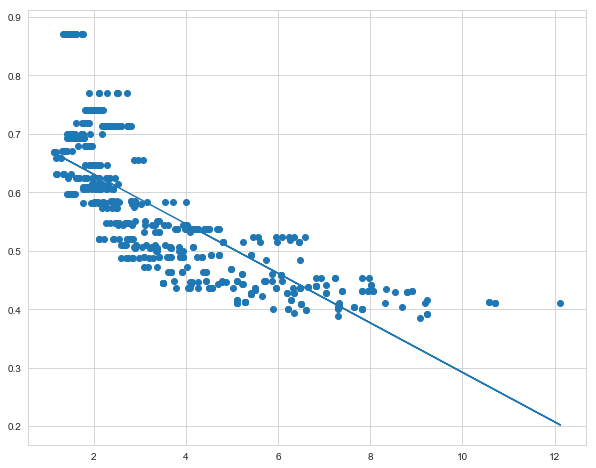

In [21]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1,1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1,1))
plt.figure(figsize = (10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_boston, model_pred)
print(r2_score(y_boston,model_pred))

## Quadratic

In [22]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_2 = LinearRegression()

In [23]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:,np.newaxis]

In [26]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [27]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R2 score = 0.70


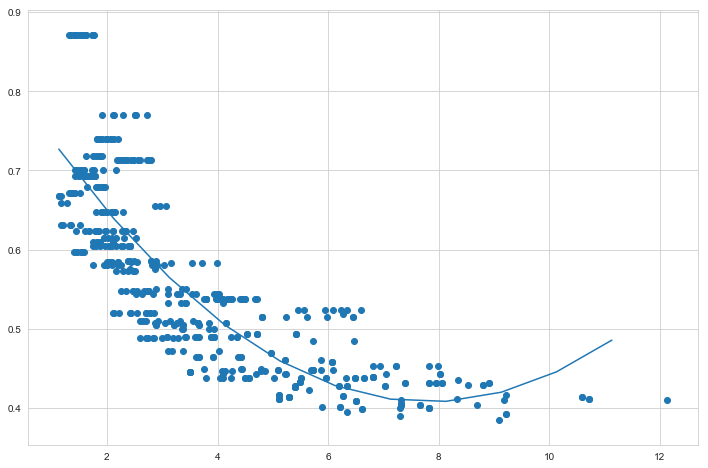

In [28]:
plt.figure(figsize = (12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print('R2 score = {:.2f}'.format(r2_score(y_boston, lin_reg_2.predict(X_poly_b))))

## Cubic

In [30]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_3 = LinearRegression()

In [31]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:,np.newaxis]

In [33]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R2 score = 0.71


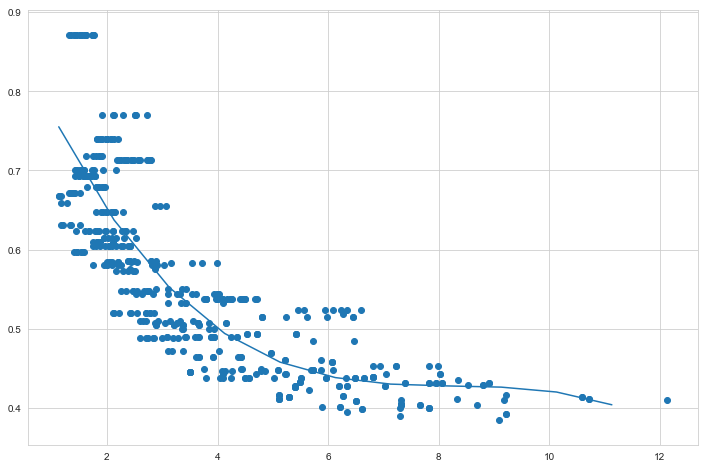

In [35]:
plt.figure(figsize = (12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print('R2 score = {:.2f}'.format(r2_score(y_boston, lin_reg_3.predict(X_poly_b))))

0.7643394574930141


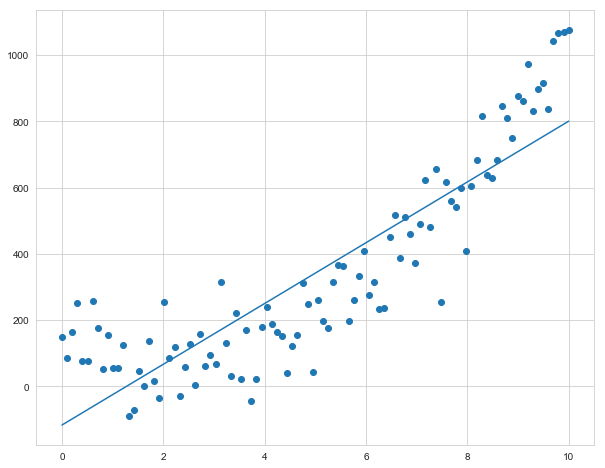

In [36]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
model_pred = lr.predict(X.reshape(-1,1))
plt.figure(figsize = (10,8))
plt.scatter(X,y)
plt.plot(X, model_pred)
print(r2_score(y,model_pred))

In [37]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [38]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y.reshape(-1,1))
y_pred = lin_reg_3.predict(X_poly)

0.9173875215431468


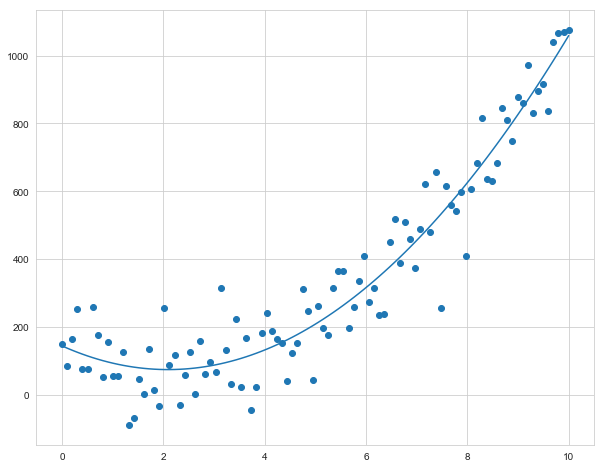

In [39]:
plt.figure(figsize = (10,8))
plt.scatter(X, y)
plt.plot(X, y_pred)
print(r2_score(y,y_pred))

In [41]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_4 = LinearRegression()

In [42]:
lin_reg_4.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:,np.newaxis]

In [44]:
y_pred = lin_reg_4.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R2 score = 0.71


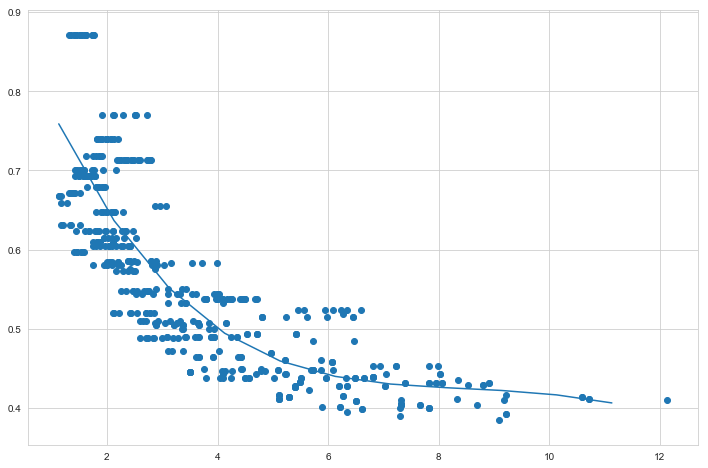

In [46]:
plt.figure(figsize = (12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print('R2 score = {:.2f}'.format(r2_score(y_boston, lin_reg_4.predict(X_poly_b))))